Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_overdose=pd.read_csv('/content/HealthCanada-SubstanceHarmsData.csv')

In [3]:
df_alert=pd.read_csv('/content/scraped_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/scraped_data.csv'

In [ ]:
df_overdose.head(20)

In [ ]:
df_overdose['Value'] = pd.to_numeric(df_overdose['Value'], errors='coerce')
# Filter for the year 2023 and "Number" unit
df_2023 = df_overdose[(df_overdose['Year_Quarter'].str.contains('2023')) & (df_overdose['Unit'] == 'Number')]

# Step 3: Group by 'Type_Event' and 'Region' and aggregate other columns
df_2023_aggregated = df_2023.groupby(['Type_Event', 'Region']).agg(
    {'Substance': 'first', 'Source': 'first', 'Specific_Measure': 'first',
     'PRUID': 'first', 'Time_Period': 'first', 'Year_Quarter': 'first',
     'Aggregator': 'first', 'Disaggregator': 'first', 'Unit': 'first',
     'Value': 'sum'}).reset_index()

# Display the results with all columns
df_2023_aggregated.head(40)


In [6]:
import pandas as pd

# Convert 'Value' column to numeric
df_overdose['Value'] = pd.to_numeric(df_overdose['Value'], errors='coerce')

# Extract the year from 'Year_Quarter' by taking the first 4 characters
df_overdose['Year'] = df_overdose['Year_Quarter'].str[:4]

# Convert 'Year' to numeric and drop invalid rows
df_overdose['Year'] = pd.to_numeric(df_overdose['Year'], errors='coerce')
df_overdose = df_overdose.dropna(subset=['Year']).astype({'Year': int})

# Filter only rows where 'Unit' is 'Number'
df_overdose = df_overdose[df_overdose['Unit'] == 'Number']

# Group by 'Type_Event', 'Region', 'Year', 'Aggregator', 'Disaggregator'
df_aggregated = df_overdose.groupby(['Type_Event', 'Region', 'Year', 'Aggregator', 'Disaggregator']).agg(
    {
        'Substance': 'first',         # Keep the first non-null value
        'Source': 'first',            # Keep the first non-null value
        'Specific_Measure': 'first',  # Keep the first non-null value
        'PRUID': 'first',             # Keep the first non-null value
        'Time_Period': 'first',       # Keep the first non-null value
        'Unit': 'first',              # Keep the first non-null value
        'Value': 'sum'                # Sum the 'Value' column
    }
).reset_index()

# Save the aggregated DataFrame to a CSV file
df_aggregated.to_csv('df_aggregated_all_years.csv', index=False)

print("Data has been saved")


Data has been saved


In [7]:
pip install scikit-learn


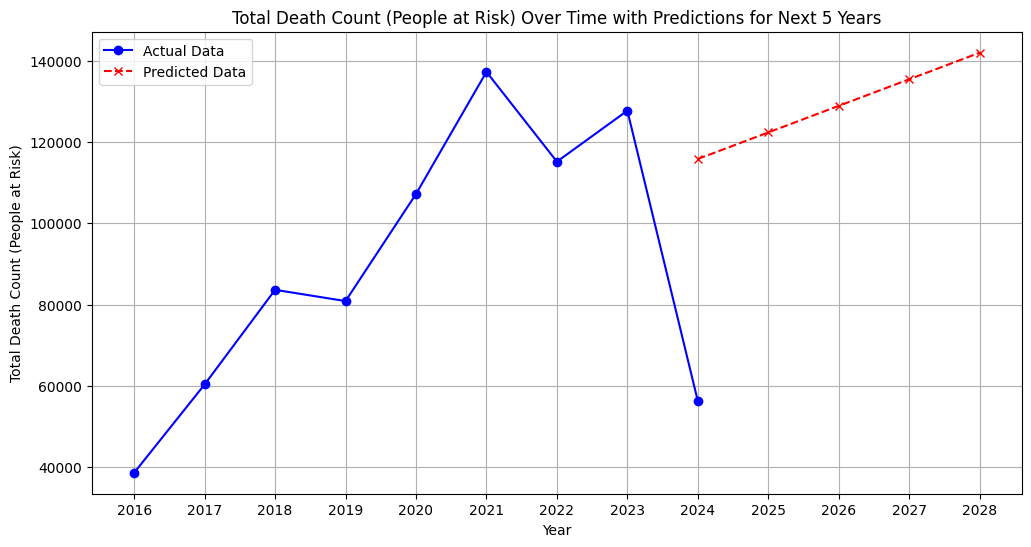

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df_aggregated = pd.read_csv('df_aggregated_all_years.csv')

# Ensure 'Value' is numeric
df_aggregated['Value'] = pd.to_numeric(df_aggregated['Value'], errors='coerce')

# Convert 'Year' to integer safely
df_aggregated['Year'] = pd.to_numeric(df_aggregated['Year'], errors='coerce').dropna().astype(int)

# Remove outliers (optional: filter extreme values)
df_aggregated = df_aggregated[df_aggregated['Value'] > 0]

# Aggregate data by year, summing the values
df_yearly = df_aggregated.groupby('Year')['Value'].sum().reset_index()

# Define future years (next 5 years)
future_years = np.arange(2024, 2029)

# Prepare regression model
X = df_yearly[['Year']].values  # Features
y = df_yearly['Value'].values   # Target

model = LinearRegression()
model.fit(X, y)

# Predict future values for the next 5 years (2024 to 2028)
predicted_values = model.predict(future_years.reshape(-1, 1))

# Ensure no negative predictions
predicted_values = np.maximum(predicted_values, 0)

# Create a DataFrame for predicted values
df_predictions = pd.DataFrame({
    'Year': future_years,
    'Predicted_Value': predicted_values
})

df_predictions.to_csv('df_predictions.csv', index=False)

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))

# Plot the actual values (for years 2016 to 2023)
plt.plot(df_yearly['Year'], df_yearly['Value'], label='Actual Data', color='blue', marker='o')

# Plot the predicted values (for years 2024 to 2028)
plt.plot(df_predictions['Year'], df_predictions['Predicted_Value'], label='Predicted Data', color='red', linestyle='--', marker='x')

# Set x-axis ticks as integers (no decimals)
plt.xticks(np.arange(2016, 2029, 1))  # Adjust this range to fit the data

plt.xlabel('Year')
plt.ylabel('Total Death Count (People at Risk)')
plt.title('Total Death Count (People at Risk) Over Time with Predictions for Next 5 Years')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
df_aggregated['Substance'].unique()

array(['Opioids', 'Stimulants'], dtype=object)